# Bioinfomatic central script
insert introduction


In [1]:
# Source the utility functions file, which should be in the scripts folder with this file
source('scripts/meg_utility_functions.R')
source('scripts/load_libraries.R')

## USER Controls
Hopefully, this section should be the only code you need to modify.However, you can look into the code in further sections if you need to change other, more subtle variables in the exploratory or statistical functions.


First, we'll need to specify the location of important files on your machine. 
    
    You'll need to input files associated with the microbiome and resistome seperately. This allows for the option of including microbiome results from qiime2 or kraken2. 
    
        For the resistome:
            > Metadata file for all resistome samples (.csv)
            > Megares annotation file (.csv)
            > Count table results from the AMRplusplus pipeline (.csv)
        For the microbiome
            > Metadata file for all microbiome samples (.tsv)
            > etc..
        

In [2]:
# In which column of the metadata file are the sample IDs stored?
sample_column_id = 'ID'

# For the resistome:

In [3]:
# Load the data, MEGARes annotations, and metadata
amr_count_filename = 'data/test_data/strict_SNP_confirmed_AMR_analytic_matrix.csv'
# Where is the metadata file stored on your machine?
amr_metadata_filepath = 'data/test_data/FC_meat_AMR_metadata.csv'
# Name of the megares annotation file used for this project
megares_annotation_filename = 'data/amr/megares_annotations_v1.03.csv'

# For the microbiome:

In [4]:
##### Two options for microbiome analysis, either 16S (below) or shotgun (I'll add)
microbiome_temp_metadata_file <- "data/test_data/FC_meat_metadata.tsv"
# Now, specify file location for 16S
biom_file <- "data/test_data/exported-biom-table/otu_table_json.biom"
tre_file <- "data/test_data/exported-tree/tree.nwk"
tax_fasta <- "data/test_data/exported-rep-seqs/dna-sequences.fasta" #https://data.qiime2.org/2017.6/tutorials/training-feature-classifiers/85_otus.fasta
taxa_file <- "data/test_data/exported-biom-table-taxa/taxonomy.tsv" #https://data.qiime2.org/2017.6/tutorials/training-feature-classifiers/85_otu_taxonomy.txt

### or Shotgun analysis 
#temp_microbiome <- read.table('microbiome_analytic_matrix.csv', header=T, row.names=1, sep=',')
#####

# Next, we have to specify which variables you want to create exploratory graphs with

In [5]:
# The following is a list of analyses based on variables in 
# your metadata.csv file that you want
# to use for EXPLORATORY analysis (NMDS, PCA, alpha rarefaction, barplots)
AMR_exploratory_analyses = list(
  # Analysis Store
  # Description: 
  list(
    name = 'Store',
    subsets = list(),
    exploratory_var = 'Blinded_Store'
  ),  
  # Analysis Dilution
  # Description: 
  list(
    name = 'Dilution',
    subsets = list(),
    exploratory_var = 'Dilution'
  ),  
  # Analysis ID
  # Description: 
  list(
    name = 'ID',
    subsets = list(),
    exploratory_var = 'ID'
  ),  
  # Analysis 1
  # Description: 
  list(
    name = 'City',
    subsets = list(),
    exploratory_var = 'City'
  ),
  # Analysis 2
  # Description:
  list(
    name = 'Treatment',
    subsets = list(),
    exploratory_var = 'Treatment'
  ),
  # Analysis 3
  # Description:
  list(
    name = 'Packaging',
    subsets = list(),
    exploratory_var = 'Packaging'
  ),
  # Analysis 3
  # Description:
  list(
    name = 'sample',
    subsets = list(),
    exploratory_var = 'sample'
  )
)



microbiome_exploratory_analyses = list(
  # Analysis Store
  # Description: 
  list(
    name = 'Store',
    subsets = list(),
    exploratory_var = 'Blinded_Store'
  ), 
  # Analysis ID
  # Description: 
  list(
    name = 'ID',
    subsets = list(),
    exploratory_var = 'ID'
  ),  
  # Analysis 1
  # Description: 
  list(
    name = 'City',
    subsets = list(),
    exploratory_var = 'City'
  ),
  # Analysis 2
  # Description:
  list(
    name = 'Treatment',
    subsets = list(),
    exploratory_var = 'Treatment'
  ),
  # Analysis 3
  # Description:
  list(
    name = 'Packaging',
    subsets = list(),
    exploratory_var = 'Packaging'
  )
)

# Each analyses you wish to perform should have its own list in the following
# statistical_analyses list.  A template is provided to get you started.
# Multiple analyses, subsets, and contrasts are valid, but only one random
# effect can be used per analysis.  The contrasts of interest must have their
# parent variable in the model matrix equation.  Contrasts are named by
# parent variable then child variable without a space inbetween, for example:
# PVar1Cvar1 where the model matrix equation is ~ 0 + Pvar1.
AMR_statistical_analyses = list(
  # Analysis 1
  # Description: 
  list(
    name = 'Treatment',
    subsets = list(),
    model_matrix = '~ 0 + Treatment ',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  ),
  # Analysis 2
  # Description: 
  list(
    name = 'Treatment_w_store',
    subsets = list(),
    model_matrix = '~ 0 + Treatment + Blinded_Store',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  ),
  # Analysis 3
  # Description: 
  list(
    name = 'Treatment_w_Dilution',
    subsets = list(),
    model_matrix = '~ 0 + Treatment + Dilution',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  ),
  # Analysis 4
  # Description: 
  list(
    name = 'Treatment_w_store_packaging',
    subsets = list(),
    model_matrix = '~ 0 + Treatment + Packaging + Blinded_Store',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  ),
  # Analysis 5
  # Description: 
  list(
    name = 'Dilution',
    subsets = list(),
    model_matrix = '~ 0 + Dilution',
    contrasts = list('DilutionNone - DilutionHalf'),
    random_effect = NA
  )
)

microbiome_statistical_analyses = list(
  # Analysis 1
  # Description: 
  list(
    name = 'Treatment',
    subsets = list(),
    model_matrix = '~ 0 + Treatment ',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  ),
  # Analysis 2
  # Description: 
  list(
    name = 'Treatment_w_store',
    subsets = list(),
    model_matrix = '~ 0 + Treatment + Blinded_Store',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  ),
  # Analysis 3
  # Description: 
  list(
    name = 'Treatment_w_store_packaging',
    subsets = list(),
    model_matrix = '~ 0 + Treatment + Blinded_Store + Packaging',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  )
)

In [6]:
####### END OF USER CONTROLS ######

###### If, 16s microbiome, run:
## Run the script to convert qiime2 results into "microbiome" objects to be used with amr_plus_plus
source('scripts/qiime2_2_phyloseq.R')
## Run the script that handles resistome data and microbiome data. 
###### If shotgun microbiome, run:
#source('scripts/metagenomeSeq_analytic.R')
source('scripts/metagenomeSeq_analytic_plus_qiime2.R')

Default value being used.
Default value being used.


# Now, you can print exploratory figures to your local directory. 

This part takes a long time, but creates relative abundance barplots, diversity barplots, NMDS, PCA, and heatmaps. 
For now it's commented out because the NMDS function creates a bunch of messages that look ugly. We can probably find a way to fix this though. 

In [21]:
######## THEN print figures #

# After running this script, these are the useful objects that contain all the data aggregated to different levels
# The metagenomeSeq objects are contained in these lists "AMR_analytic_data" and "microbiome_analytic_data"
# Melted counts are contained in these data.table objects "amr_melted_analytic" "microbiome_melted_analytic"

## Run code to make some exploratory figures, zero inflated gaussian model, and output count matrices.
#suppressMessages(source('scripts/print_figures.R'))

# Here, we can have an area to show them how to play around with ggplot2
    
    First, combine the normalized count tables with the metadata file.

In [7]:
head(amr_melted_analytic)

Level_ID,Name,ID,Normalized_Count
Class,betalactams,FC.199A1in2_concatenated,2967.2131
Class,Tetracyclines,FC.199A1in2_concatenated,15000.0000
Class,Multi-drug resistance,FC.199A1in2_concatenated,3377.0492
Class,Aminoglycosides,FC.199A1in2_concatenated,557.3770
Class,Bacitracin,FC.199A1in2_concatenated,0.0000
Class,MLS,FC.199A1in2_concatenated,131.1475


In [8]:
### Start of code for figures, combine table objects to include meta
setkey(amr_melted_raw_analytic,ID) 
setkey(amr_melted_analytic,ID) 

setkey(microbiome_melted_analytic,ID)
# Set keys for both metadata files
setkey(metadata,ID)
setkey(microbiome_metadata,ID)
microbiome_melted_analytic <- microbiome_melted_analytic[microbiome_metadata]
amr_melted_raw_analytic <- amr_melted_raw_analytic[metadata]
amr_melted_analytic <- amr_melted_analytic[metadata]

# Create plots below

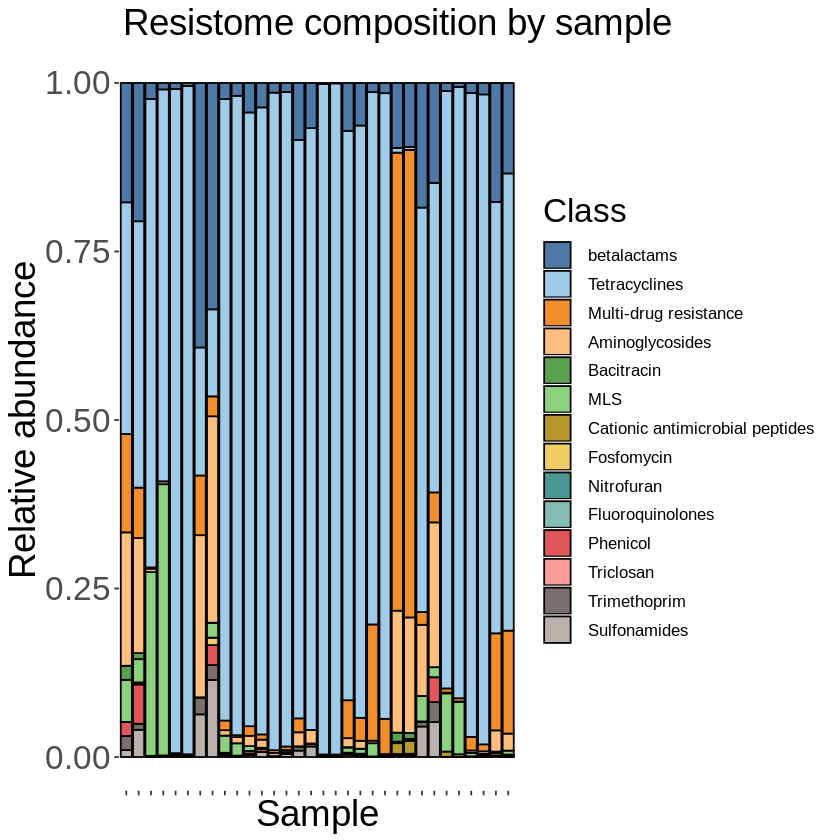

In [9]:
## Figure 1 showing resistome composition
AMR_class_sum <- amr_melted_analytic[Level_ID=="Class", .(sum_class= sum(Normalized_Count)),by=.(ID, Name, Packaging, Treatment)][order(-Packaging )]
AMR_class_sum[,total:= sum(sum_class), by=.(ID)]
AMR_class_sum[,percentage:= sum_class/total ,by=.(ID, Name) ]
AMR_class_sum$Class <- AMR_class_sum$Name
fig1 <- ggplot(AMR_class_sum, aes(x = ID, y = percentage, fill = Class)) + 
  geom_bar(stat = "identity",colour = "black")+
  #facet_wrap( ~ Treatment, scales='free',ncol = 2) +
  #scale_fill_brewer(palette="Dark2") +
  theme(
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(),
    strip.text.x=element_text(size=22),
    strip.text.y=element_text(size=22, angle=0),
    axis.text.x=element_blank(), #element_text(size=16, angle=20, hjust=1)
    axis.text.y=element_text(size=20),
    axis.title=element_text(size=22),
    legend.position="right",
    panel.spacing=unit(0.1, "lines"),
    plot.title=element_text(size=22, hjust=0.5),
    legend.text=element_text(size=10),
    legend.title=element_text(size=20),
    panel.background = element_rect(fill = "white")
  ) +
  ggtitle("\t\tResistome composition by sample") +
  xlab('Sample') +
  ylab('Relative abundance') +
  scale_fill_tableau("Tableau 20") 
fig1

In [ ]:
fig1